In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
#載入資料
iris = load_iris()
df_iris = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species_name'] = df_iris['species'].map({i:name for i , name in enumerate(iris.target_names)})
print(df_iris.head())
print(df_iris.describe())
print(df_iris.info())
print(df_iris['species_name'].value_counts())#確認種類平衡

   sepal length (cm)  sepal width (cm)  ...  species  species_name
0                5.1               3.5  ...        0        setosa
1                4.9               3.0  ...        0        setosa
2                4.7               3.2  ...        0        setosa
3                4.6               3.1  ...        0        setosa
4                5.0               3.6  ...        0        setosa

[5 rows x 6 columns]
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)     species
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000      

In [ ]:
#資料視覺化(Pair Plot)
sns.pairplot(data = df_iris, hue = 'species_name', diag_kind='kde')
plt.suptitle("Pair plot of IRIS", y=1.02)
plt.show()

In [40]:
#資料分割
from sklearn.model_selection import train_test_split
X = df_iris[iris.feature_names]
y = df_iris['species']
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
#模型評估
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svm_model = SVC(kernel='rbf' , random_state=40)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy:{accuracy:.3f}")
print(classification_report(y_test,y_pred,target_names=iris.target_names))
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Prediction Lable')
plt.ylabel('True Lable')
plt.title('Confusion Matrix of SVM')
plt.show()

In [42]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
#決策邊界視覺化(僅限二維特徵)
X_2d = df_iris[['petal length (cm)', 'petal width (cm)']]
y_2d = df_iris['species']
X_train_2d , X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d,y_2d, test_size=0.3, random_state=0)
svm_model_2d = SVC(kernel='rbf' , random_state=42, C=1.0)
svm_model_2d.fit(X_train_2d, y_train_2d)


plt.figure(figsize=(8,6))
X_min, X_max = X_2d['petal length (cm)'].min()-0.5 , X_2d['petal length (cm)'].max()+0.5
y_min, y_max = X_2d['petal width (cm)'].min()-0.5 , X_2d['petal width (cm)'].max()+0.5

xx , yy = np.meshgrid(np.arange(X_min, X_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx , yy , Z , alpha=0.8 , cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_train_2d['petal length (cm)'] , y = X_train_2d['petal width (cm)'], hue=y_train_2d,
                palette='viridis', s=100, legend='full', markers='o', edgecolor = 'black')

#繪製支撐向量
plt.scatter(svm_model_2d.support_vectors_[:,0], svm_model_2d.support_vectors_[:,1], s=200,
            facecolor = 'none', edgecolors='k' , linewidths=1.5 , label = 'Support Vectors')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('SVM Boundry with RBF Kernel')
plt.legend(title='Species')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#模型超參數調優; Grid Search 與 K-fold Cross Validation
param_grid = {
    'C': [0.1,1,10,100],
    'gamma' : [0.001,0.01,0.1,1,'scale'],
    'kernel': ['rbf','linear']
}
grid_search = GridSearchCV(SVC(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVC(C=10, gamma=0.1, random_state=0)


In [63]:
best_svm_model = grid_search.best_estimator_
print(best_svm_model)
y_pred_best = grid_search.predict(X_test)

print(classification_report(y_test, y_pred_best, target_names=iris.target_names))
print(f'{accuracy_score(y_test,y_pred_best)}')

SVC(C=10, gamma=0.1, random_state=0)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [67]:
print("--- 14.2.1 資料收集與準備 ---")
try:
    data_url = "D:\職訓\python機器學習\WA_Fn-UseC_-Telco-Customer-Churn.csv"
    df = pd.read_csv(data_url)
    print("電信客戶流失資料集載入成功。")
except Exception as e:
    print(f"資料集載入失敗: {e}")
    print("請確認網路連接或資料集 URL 是否正確。")
    print("如果無法從 URL 載入，請手動下載 'WA_Fn-UseC_-Telco-Customer-Churn.csv' 檔案到您的專案資料夾。")
    df = pd.DataFrame() # 確保 df 存在


--- 14.2.1 資料收集與準備 ---
電信客戶流失資料集載入成功。


In [68]:
if not df.empty:
    print("\n資料集的前 5 行 (Head):")
    print(df.head())

    print("\n資料集的基本資訊 (Info):")
    df.info()

    print("\n資料集描述性統計 (Describe):")
    print(df.describe())

    print("\n各欄位缺失值數量 (Missing Values):")
    print(df.isnull().sum())



資料集的前 5 行 (Head):
   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

資料集的基本資訊 (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int

In [69]:
if not df.empty:
    print("\n資料集的前 5 行 (Head):")
    print(df.head())

    print("\n資料集的基本資訊 (Info):")
    df.info()

    print("\n資料集描述性統計 (Describe):")
    print(df.describe())

    print("\n各欄位缺失值數量 (Missing Values):")
    print(df.isnull().sum())



資料集的前 5 行 (Head):
   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

資料集的基本資訊 (Info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int

In [70]:
if not df.empty:
    # 1. 處理 TotalCharges 欄位
    # 將 TotalCharges 轉換為數值類型，'coerce' 參數會將無法轉換的值變為 NaN
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # 2. 處理缺失值 (針對 TotalCharges)
    # 重新檢查缺失值
    print("\n轉換 TotalCharges 後的缺失值數量:")
    print(df.isnull().sum())

    # 由於 TotalCharges 只有 11 個缺失值，我們可以直接刪除這些行
    df.dropna(inplace=True)
    print(f"\n刪除缺失值後的資料集包含 {df.shape[0]} 個樣本。")

    # 3. 刪除 customerID 欄位
    df.drop('customerID', axis=1, inplace=True)
    print("已刪除 'customerID' 欄位。")

    # 確認所有資料類型
    print("\n清理後資料集的基本資訊 (Info):")
    df.info()



轉換 TotalCharges 後的缺失值數量:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

刪除缺失值後的資料集包含 7032 個樣本。
已刪除 'customerID' 欄位。

清理後資料集的基本資訊 (Info):
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 

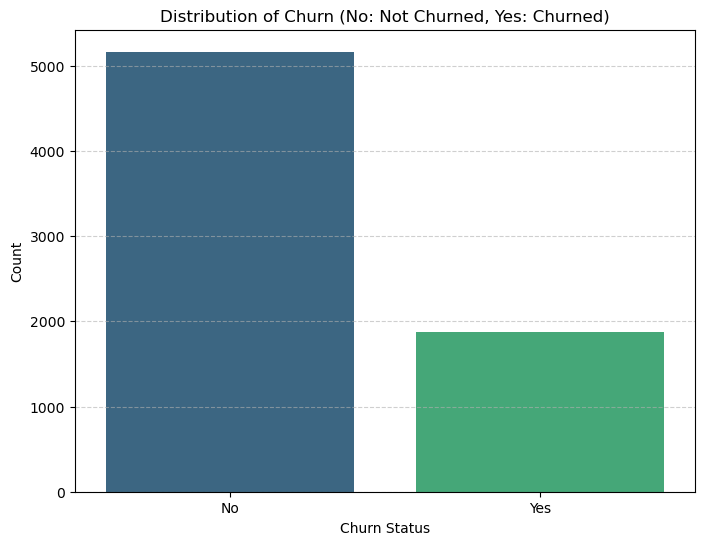


未流失 (No) 數量: 5163
流失 (Yes) 數量: 1869
流失比例: 26.58%


In [71]:
if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Churn', hue='Churn', data=df, palette='viridis', legend=False)
    plt.title('Distribution of Churn (No: Not Churned, Yes: Churned)')
    plt.xlabel('Churn Status')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    churn_counts = df['Churn'].value_counts()
    print(f"\n未流失 (No) 數量: {churn_counts['No']}")
    print(f"流失 (Yes) 數量: {churn_counts['Yes']}")
    print(f"流失比例: {churn_counts['Yes'] / df.shape[0]:.2%}")


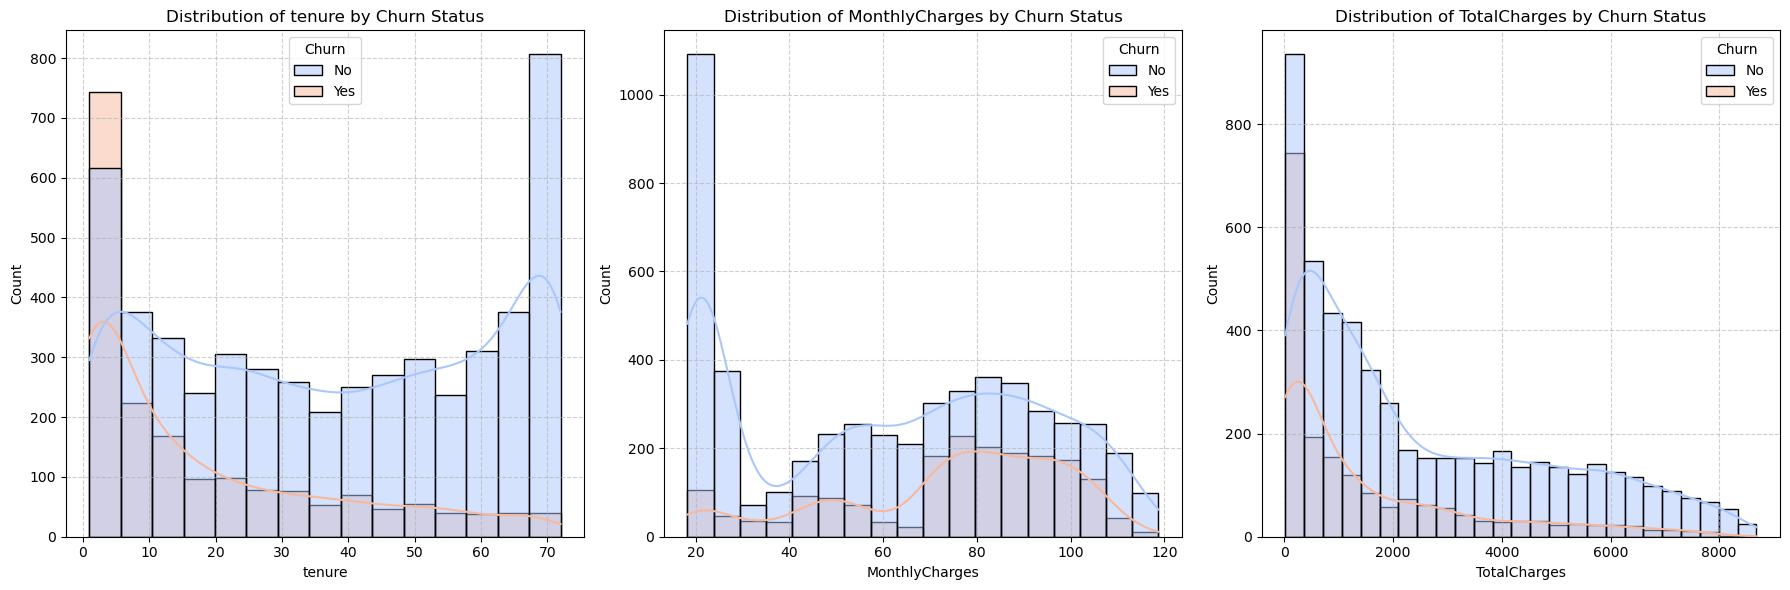

In [72]:
if not df.empty:
    # 數值特徵與流失的關係
    numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

    plt.figure(figsize=(18, 6))
    for i, col in enumerate(numerical_features):
        plt.subplot(1, 3, i + 1)
        sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm')
        plt.title(f'Distribution of {col} by Churn Status')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


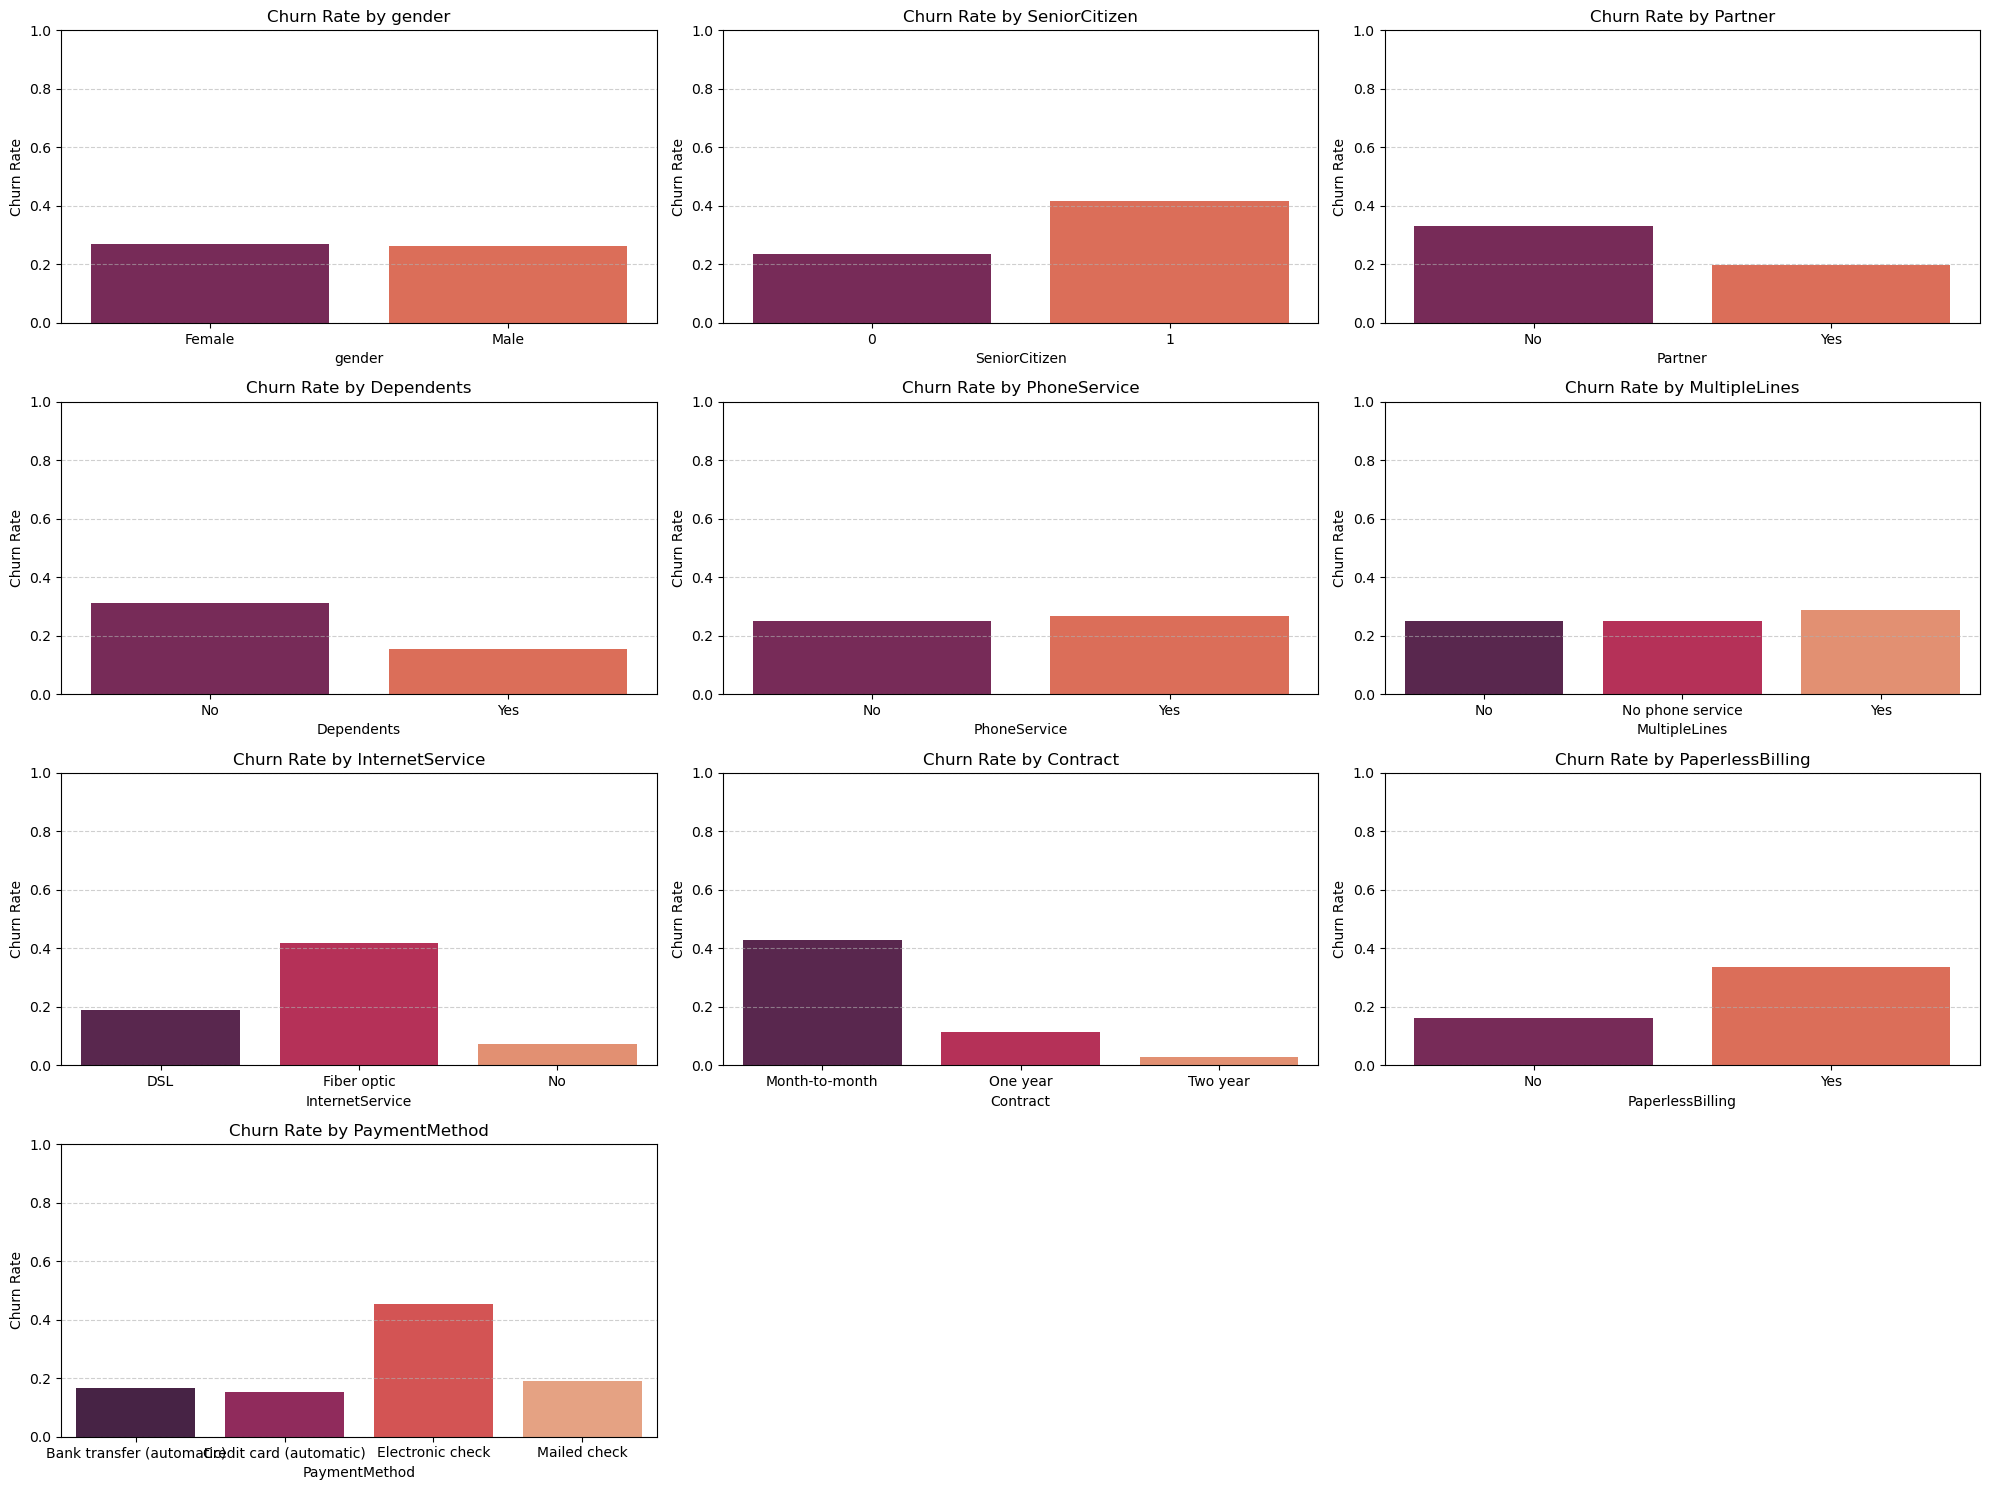

In [73]:
if not df.empty:
    # 類別特徵與流失的關係
    # 選擇一些有代表性的分類特徵
    categorical_features_for_plot = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
        'Contract', 'PaperlessBilling', 'PaymentMethod'
    ]

    plt.figure(figsize=(20, 15)) # 調整整體圖形大小
    for i, col in enumerate(categorical_features_for_plot):
        plt.subplot(4, 3, i + 1) # 4 行 3 列的子圖佈局
        # 計算每個類別中流失的比例
        churn_rates = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean()).reset_index()
        sns.barplot(x=col, y='Churn', hue=col, legend=False, data=churn_rates, palette='rocket')
        plt.title(f'Churn Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Churn Rate')
        plt.ylim(0, 1) # 設定 y 軸範圍為 0 到 1 (比例)
        plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout() # 自動調整子圖參數，使之填充整個圖像區域
    plt.show()


In [74]:
# 將目標變數 'Churn' 分離出來
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"特徵資料 X 的形狀: {X.shape}")
print(f"目標變數 y 的形狀: {y.shape}")

# 查看目標變數的前幾行
print("\n目標變數 y 的前 5 行:")
print(y.head())


特徵資料 X 的形狀: (7032, 19)
目標變數 y 的形狀: (7032,)

目標變數 y 的前 5 行:
0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object


In [75]:
# 將目標變數 'Churn' 從 'Yes'/'No' 轉換為 1/0
# 使用 LabelEncoder 是處理二元目標變數的常用方法
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\n目標變數 'Churn' 轉換後的類別對應: (0代表'No', 1代表'Yes')")
print(label_encoder.classes_) # 印出原始類別對應的數值
print("\n轉換後目標變數 y_encoded 的前 5 行:")
print(y_encoded[:5])



目標變數 'Churn' 轉換後的類別對應: (0代表'No', 1代表'Yes')
['No' 'Yes']

轉換後目標變數 y_encoded 的前 5 行:
[0 0 1 0 1]


In [76]:
# 識別數值型和類別型特徵
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# 注意：'SeniorCitizen' 雖然是數值 (0/1)，但它本質上是類別特徵，我們將它納入類別特徵處理
if 'SeniorCitizen' in numerical_features:
    numerical_features.remove('SeniorCitizen')
    categorical_features.append('SeniorCitizen')

print(f"\n數值型特徵: {numerical_features}")
print(f"類別型特徵: {categorical_features}")



數值型特徵: ['tenure', 'MonthlyCharges', 'TotalCharges']
類別型特徵: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 定義數值特徵的預處理步驟
numerical_transformer = StandardScaler()

# 定義類別特徵的預處理步驟
# handle_unknown='ignore' 會忽略訓練集中沒有見過的新類別，並將其編碼為全零向量
# drop='first' 避免多重共線性，為每個類別組刪除一個類別列
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# 使用 ColumnTransformer 應用不同的轉換器到不同的欄位
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 將預處理步驟應用到特徵資料 X
# fit_transform 會學習資料的轉換規則 (例如平均值、標準差、類別) 並應用轉換
X_processed = preprocessor.fit_transform(X)

print("特徵預處理完成。")
print(f"預處理後特徵資料 X_processed 的形狀: {X_processed.shape}")


特徵預處理完成。
預處理後特徵資料 X_processed 的形狀: (7032, 30)


In [78]:
# 獲取 OneHotEncoder 轉換後的類別特徵名稱
# get_feature_names_out 適用於 scikit-learn >= 0.23 版本
try:
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
except AttributeError:
    # 對於舊版 scikit-learn ( < 0.23)
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names(categorical_features)

# 將數值特徵名稱和 One-Hot 編碼特徵名稱合併
all_feature_names = numerical_features + ohe_feature_names.tolist()

# 將處理後的特徵陣列轉換回 DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names, index=X.index)

print("\n處理後特徵資料 X_processed_df 的前 5 行:")
print(X_processed_df.head())

print(f"\n處理後特徵資料 X_processed_df 的形狀: {X_processed_df.shape}")



處理後特徵資料 X_processed_df 的前 5 行:
     tenure  MonthlyCharges  ...  PaymentMethod_Mailed check  SeniorCitizen_1
0 -1.280248       -1.161694  ...                         0.0              0.0
1  0.064303       -0.260878  ...                         1.0              0.0
2 -1.239504       -0.363923  ...                         1.0              0.0
3  0.512486       -0.747850  ...                         0.0              0.0
4 -1.239504        0.196178  ...                         0.0              0.0

[5 rows x 30 columns]

處理後特徵資料 X_processed_df 的形狀: (7032, 30)


In [79]:
from sklearn.model_selection import train_test_split

# 劃分資料集為訓練集和測試集
# X_processed_df 是在 14.2.2 節中經過處理後的特徵 DataFrame
# y_encoded 是在 14.2.2 節中經過 LabelEncoder 轉換後的目標變數 (0/1)
# test_size=0.2 表示 20% 的資料用於測試，80% 用於訓練
# random_state=42 用於確保每次劃分結果一致，方便重現
# stratify=y_encoded 參數確保訓練集和測試集中目標變數的類別比例與原始資料集相同，這對於類別不平衡問題尤為重要
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"訓練集特徵 X_train 的形狀: {X_train.shape}")
print(f"測試集特徵 X_test 的形狀: {X_test.shape}")
print(f"訓練集目標 y_train 的形狀: {y_train.shape}")
print(f"測試集目標 y_test 的形狀: {y_test.shape}")

print("\n訓練集目標變數類別分佈:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\n測試集目標變數類別分佈:")
print(pd.Series(y_test).value_counts(normalize=True))


訓練集特徵 X_train 的形狀: (5625, 30)
測試集特徵 X_test 的形狀: (1407, 30)
訓練集目標 y_train 的形狀: (5625,)
測試集目標 y_test 的形狀: (1407,)

訓練集目標變數類別分佈:
0    0.734222
1    0.265778
Name: proportion, dtype: float64

測試集目標變數類別分佈:
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [80]:
from sklearn.linear_model import LogisticRegression

# 初始化 LogisticRegression 模型
# solver='liblinear' 是一個小型資料集的好選擇，並支持 L1/L2 正則化
# random_state: 確保結果可重現
# class_weight='balanced': 處理類別不平衡問題，自動調整不同類別的權重
lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

print("\n開始訓練 Logistic Regression 模型...")
lr_model.fit(X_train, y_train)
print("Logistic Regression 模型訓練完成。")



開始訓練 Logistic Regression 模型...
Logistic Regression 模型訓練完成。


In [81]:
from sklearn.ensemble import RandomForestClassifier

# 初始化 RandomForestClassifier 模型
# n_estimators: 森林中樹的數量
# random_state: 確保結果可重現
# n_jobs: 使用的 CPU 核心數，-1 表示使用所有可用核心
# class_weight='balanced': 同樣處理類別不平衡
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')

print("\n開始訓練 Random Forest Classifier 模型...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier 模型訓練完成。")



開始訓練 Random Forest Classifier 模型...
Random Forest Classifier 模型訓練完成。


In [82]:
from xgboost import XGBClassifier

# 初始化 XGBClassifier 模型
# objective: 損失函數，'binary:logistic' 用於二元分類，輸出機率
# n_estimators: 樹的數量
# learning_rate: 學習率
# use_label_encoder=False: 避免未來版本移除該參數的警告
# eval_metric='logloss': 評估指標
# scale_pos_weight: 處理類別不平衡的關鍵參數，用於平衡正負樣本的權重
# 計算 scale_pos_weight
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight_value = neg_count / pos_count
print(f"\nXGBoost scale_pos_weight 參數值: {scale_pos_weight_value:.2f}")

xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight_value # 處理類別不平衡
)

print("\n開始訓練 XGBoost Classifier 模型...")
xgb_model.fit(X_train, y_train)
print("XGBoost Classifier 模型訓練完成。")



XGBoost scale_pos_weight 參數值: 2.76

開始訓練 XGBoost Classifier 模型...
XGBoost Classifier 模型訓練完成。



--- Logistic Regression 模型評估 ---
Accuracy: 0.72
Precision: 0.49
Recall: 0.79
F1-Score: 0.61
AUC: 0.84

混淆矩陣 (Confusion Matrix):
[[723 310]
 [ 77 297]]


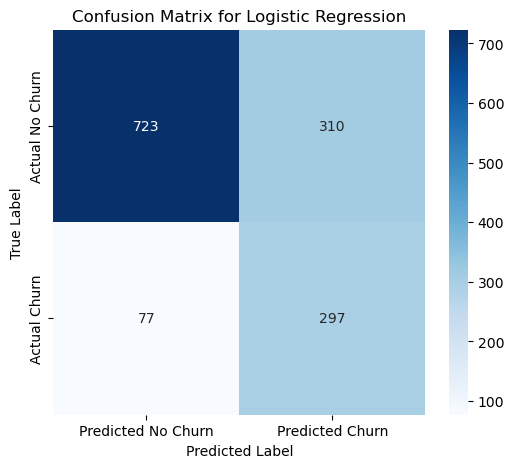

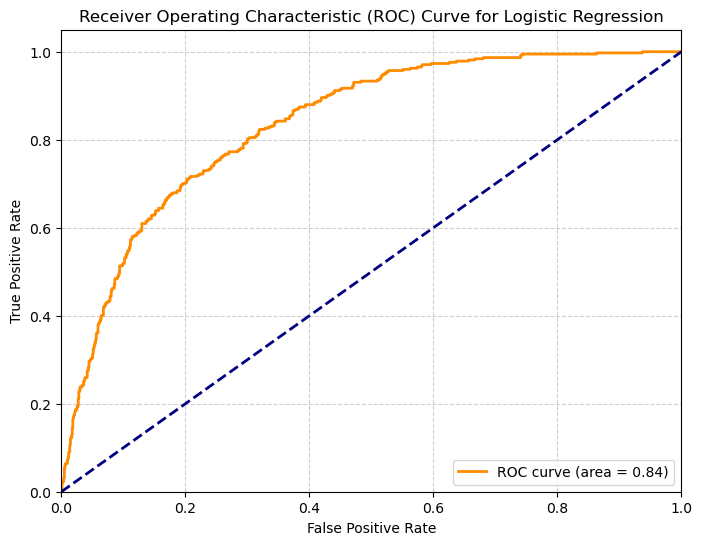

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 使用訓練好的 Logistic Regression 模型在測試集上進行預測
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1] # 獲取預測為正類 (1, 流失) 的機率

# 計算評估指標
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)

# 計算 ROC 曲線和 AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

print("\n--- Logistic Regression 模型評估 ---")
print(f"Accuracy: {acc_lr:.2f}")
print(f"Precision: {prec_lr:.2f}")
print(f"Recall: {rec_lr:.2f}")
print(f"F1-Score: {f1_lr:.2f}")
print(f"AUC: {auc_lr:.2f}")

print("\n混淆矩陣 (Confusion Matrix):")
print(conf_mat_lr)

# 視覺化混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 視覺化 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



--- Random Forest Classifier 模型評估 ---
Accuracy: 0.79
Precision: 0.63
Recall: 0.49
F1-Score: 0.55
AUC: 0.82

混淆矩陣 (Confusion Matrix):
[[927 106]
 [190 184]]


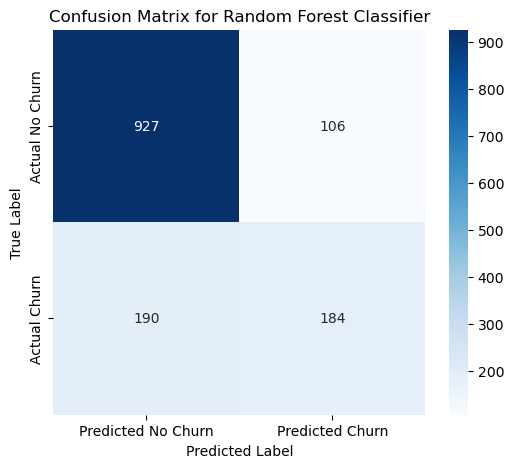

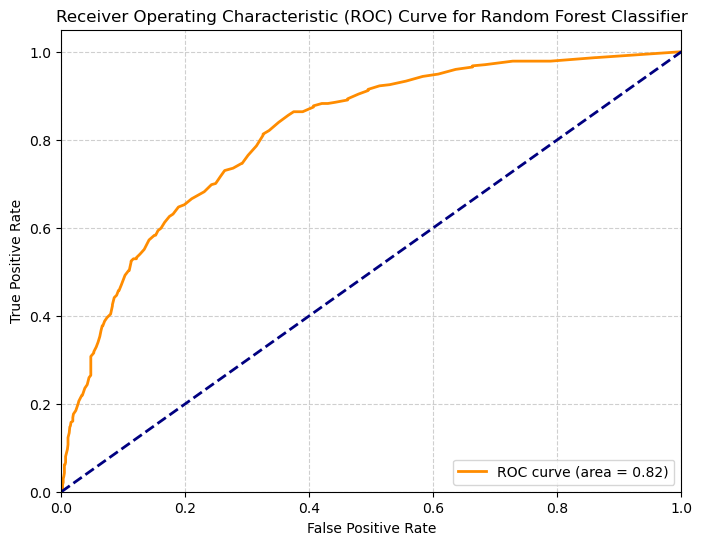

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# 使用訓練好的 Random Forest 模型在測試集上進行預測
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 計算評估指標
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# 計算 ROC 曲線和 AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

print("\n--- Random Forest Classifier 模型評估 ---")
print(f"Accuracy: {acc_rf:.2f}")
print(f"Precision: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")
print(f"AUC: {auc_rf:.2f}")

print("\n混淆矩陣 (Confusion Matrix):")
print(conf_mat_rf)

# 視覺化混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 視覺化 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



--- XGBoost Classifier 模型評估 (初始) ---
Accuracy: 0.75
Precision: 0.52
Recall: 0.78
F1-Score: 0.62
AUC: 0.84

混淆矩陣 (Confusion Matrix):
[[762 271]
 [ 82 292]]


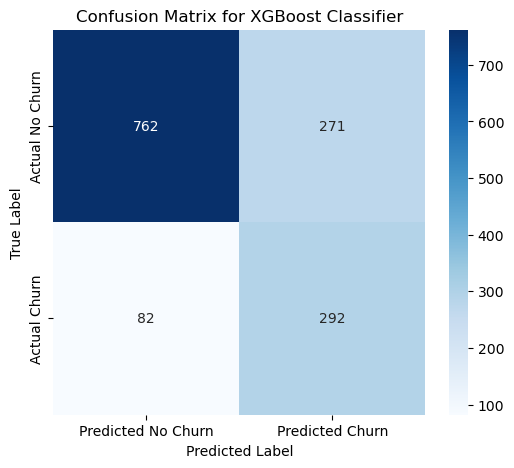

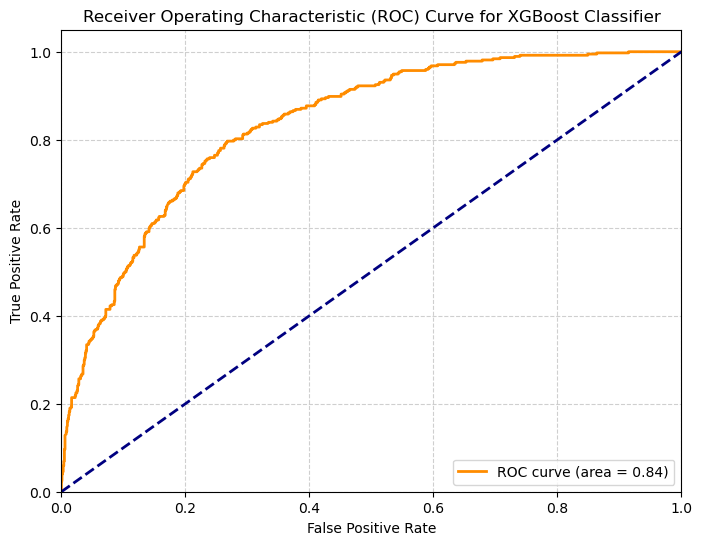

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# 使用訓練好的 XGBoost 模型在測試集上進行預測
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 計算評估指標
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)

# 計算 ROC 曲線和 AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

print("\n--- XGBoost Classifier 模型評估 (初始) ---")
print(f"Accuracy: {acc_xgb:.2f}")
print(f"Precision: {prec_xgb:.2f}")
print(f"Recall: {rec_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")
print(f"AUC: {auc_xgb:.2f}")

print("\n混淆矩陣 (Confusion Matrix):")
print(conf_mat_xgb)

# 視覺化混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 視覺化 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



開始進行 XGBoost Classifier 超參數網格搜索 (Grid Search)...
XGBoost Classifier 超參數網格搜索完成。

最佳 XGBoost 超參數組合: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
最佳 XGBoost 模型在交叉驗證中的平均 F1-Score: 0.63

--- 最佳 XGBoost Classifier 模型在測試集上的最終評估 ---
Accuracy: 0.73
Precision: 0.50
Recall: 0.80
F1-Score: 0.61
AUC: 0.84

混淆矩陣 (Confusion Matrix):
[[729 304]
 [ 75 299]]


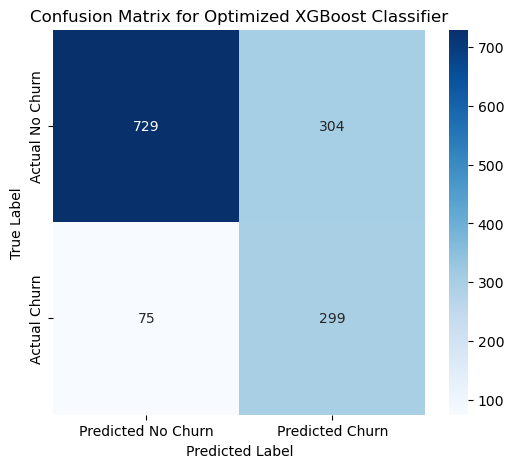

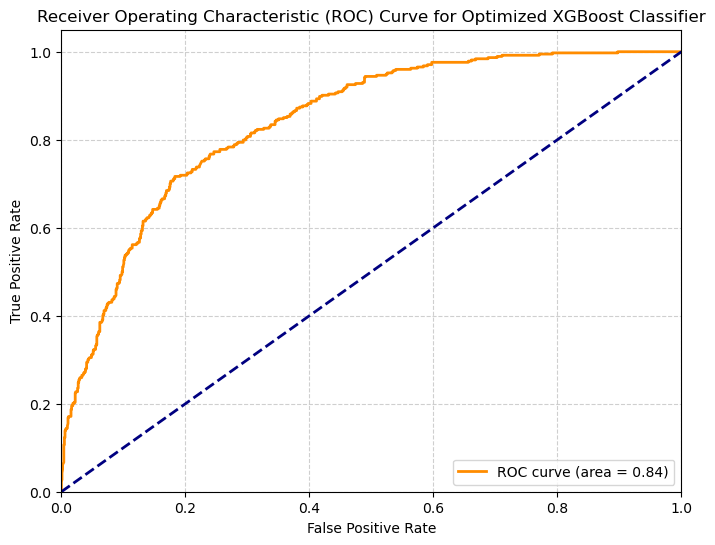

In [86]:
from sklearn.model_selection import GridSearchCV

# 定義 XGBoost 模型的超參數網格
param_grid_xgb_opt = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    # 'scale_pos_weight': [scale_pos_weight_value, 1.0] # 也可以在這裡探索不同的權重
    # 為了簡化範例，我們假設 scale_pos_weight 已經根據資料平衡處理過
}

# 初始化 GridSearchCV
# scoring='f1'：對於類別不平衡，優化 F1-score 通常是一個好選擇
# 或者可以選擇 'recall' 如果您更關注召回率
# n_jobs=-1 使用所有CPU
grid_search_xgb_opt = GridSearchCV(
    estimator=XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1,
                            eval_metric='logloss',
                            scale_pos_weight=scale_pos_weight_value), # 保持處理不平衡的參數
    param_grid=param_grid_xgb_opt,
    cv=3, # 3-fold 交叉驗證
    scoring='f1', # 優化 F1-Score
    n_jobs=-1
)

print("\n開始進行 XGBoost Classifier 超參數網格搜索 (Grid Search)...")
grid_search_xgb_opt.fit(X_train, y_train)
print("XGBoost Classifier 超參數網格搜索完成。")

# 列印最佳超參數組合和最佳分數
print(f"\n最佳 XGBoost 超參數組合: {grid_search_xgb_opt.best_params_}")
print(f"最佳 XGBoost 模型在交叉驗證中的平均 F1-Score: {grid_search_xgb_opt.best_score_:.2f}")

# 獲取最佳模型
best_xgb_model = grid_search_xgb_opt.best_estimator_

# 使用最佳模型在獨立的測試集上進行最終評估
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
prec_best_xgb = precision_score(y_test, y_pred_best_xgb)
rec_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
conf_mat_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

fpr_best_xgb, tpr_best_xgb, thresholds_best_xgb = roc_curve(y_test, y_prob_best_xgb)
auc_best_xgb = auc(fpr_best_xgb, tpr_best_xgb)

print("\n--- 最佳 XGBoost Classifier 模型在測試集上的最終評估 ---")
print(f"Accuracy: {acc_best_xgb:.2f}")
print(f"Precision: {prec_best_xgb:.2f}")
print(f"Recall: {rec_best_xgb:.2f}")
print(f"F1-Score: {f1_best_xgb:.2f}")
print(f"AUC: {auc_best_xgb:.2f}")

print("\n混淆矩陣 (Confusion Matrix):")
print(conf_mat_best_xgb)

# 視覺化優化後模型的混淆矩陣
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_best_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix for Optimized XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 視覺化優化後模型的 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_xgb, tpr_best_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_best_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized XGBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [87]:
# 假設已經執行了 14.2.4 節的程式碼，並得到了以下變數：
# acc_lr, prec_lr, rec_lr, f1_lr, auc_lr (Logistic Regression)
# acc_rf, prec_rf, rec_rf, f1_rf, auc_rf (Random Forest)
# acc_xgb, prec_xgb, rec_xgb, f1_xgb, auc_xgb (XGBoost, 初始)
# acc_best_xgb, prec_best_xgb, rec_best_xgb, f1_best_xgb, auc_best_xgb (XGBoost, 優化後)

print("\n--- 模型效能比較 ---")
print("-"*100)
print(f"| {'Model':<30} | {'Accuracy':<10} | {'Precision':<10} | {'Recall':<10} | {'F1-Score':<10} | {'AUC':<10} |")
print("-"*100)
print(f"| {'Logistic Regression':<30} | {acc_lr:<10.2f} | {prec_lr:<10.2f} | {rec_lr:<10.2f} | {f1_lr:<10.2f} | {auc_lr:<10.2f} |")
print(f"| {'Random Forest Classifier':<30} | {acc_rf:<10.2f} | {prec_rf:<10.2f} | {rec_rf:<10.2f} | {f1_rf:<10.2f} | {auc_rf:<10.2f} |")
print(f"| {'XGBoost Classifier (Default)':<30} | {acc_xgb:<10.2f} | {prec_xgb:<10.2f} | {rec_xgb:<10.2f} | {f1_xgb:<10.2f} | {auc_xgb:<10.2f} |")
print(f"| {'XGBoost Classifier (Optimized)':<30} | {acc_best_xgb:<10.2f} | {prec_best_xgb:<10.2f} | {rec_best_xgb:<10.2f} | {f1_best_xgb:<10.2f} | {auc_best_xgb:<10.2f} |")
print("-"*100)



--- 模型效能比較 ---
----------------------------------------------------------------------------------------------------
| Model                          | Accuracy   | Precision  | Recall     | F1-Score   | AUC        |
----------------------------------------------------------------------------------------------------
| Logistic Regression            | 0.72       | 0.49       | 0.79       | 0.61       | 0.84       |
| Random Forest Classifier       | 0.79       | 0.63       | 0.49       | 0.55       | 0.82       |
| XGBoost Classifier (Default)   | 0.75       | 0.52       | 0.78       | 0.62       | 0.84       |
| XGBoost Classifier (Optimized) | 0.73       | 0.50       | 0.80       | 0.61       | 0.84       |
----------------------------------------------------------------------------------------------------


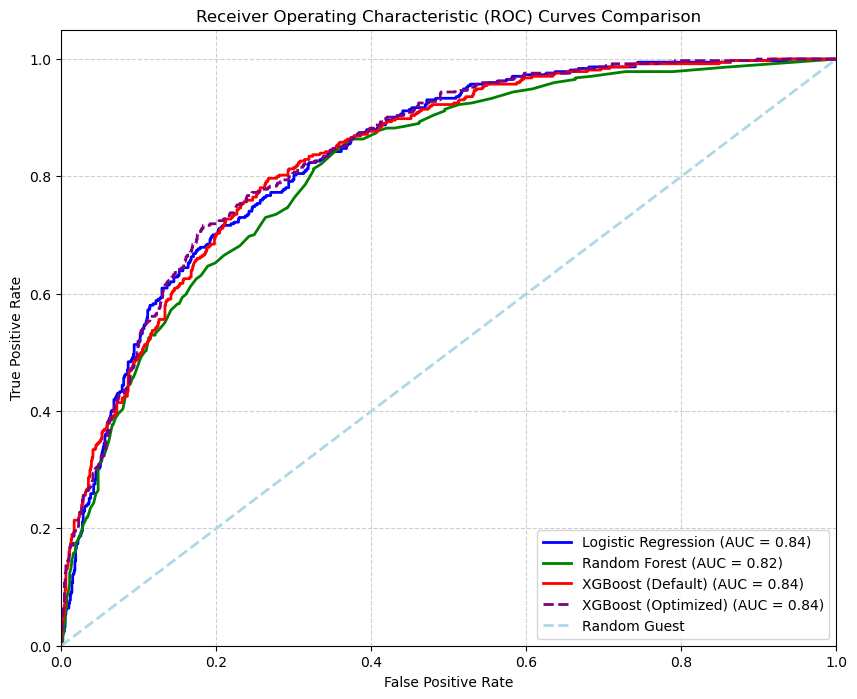

In [88]:
# 繪製所有模型的 ROC 曲線
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (Default) (AUC = {auc_xgb:.2f})')
plt.plot(fpr_best_xgb, tpr_best_xgb, color='purple', lw=2, linestyle='--', label=f'XGBoost (Optimized) (AUC = {auc_best_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='lightblue', lw=2, linestyle='--', label='Random Guest') # 隨機猜測線
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



--- 特徵重要性分析 (Optimized XGBoost Model) ---
                           Feature  Importance
24               Contract_Two year    0.368406
23               Contract_One year    0.225272
9      InternetService_Fiber optic    0.128924
10              InternetService_No    0.036048
22             StreamingMovies_Yes    0.034281
0                           tenure    0.020519
27  PaymentMethod_Electronic check    0.020336
20                 StreamingTV_Yes    0.014280
12              OnlineSecurity_Yes    0.014252
25            PaperlessBilling_Yes    0.013889


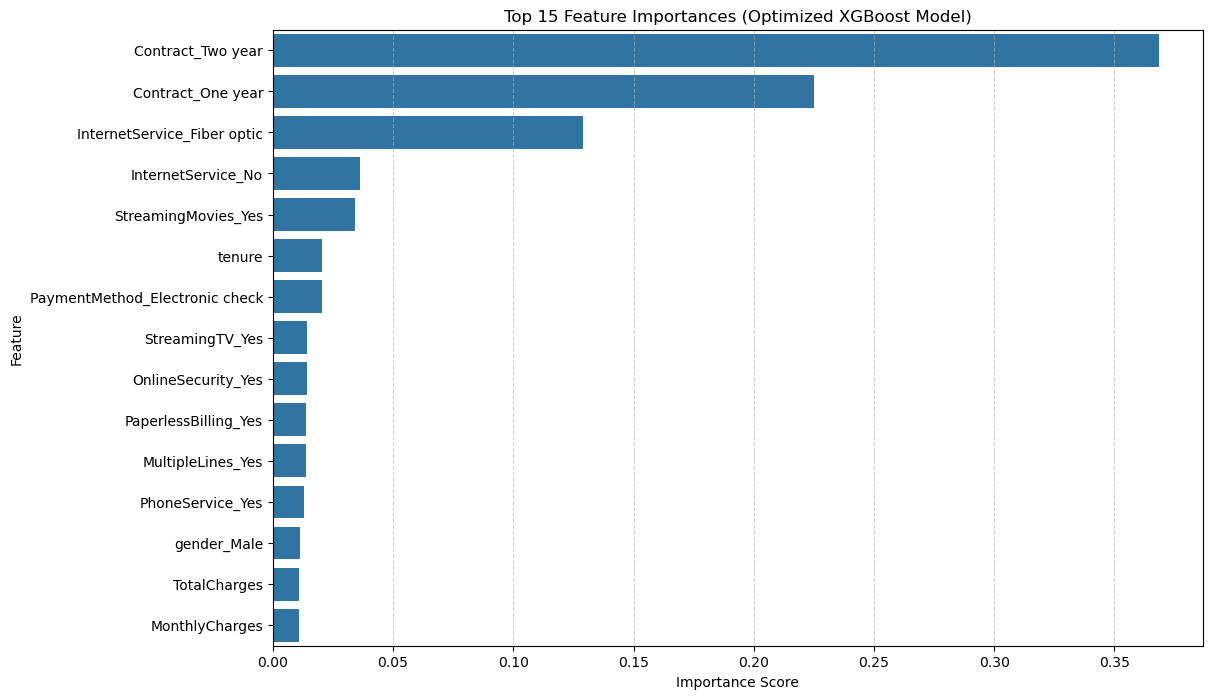

In [89]:
import pandas as pd # 確保 pandas 導入

# 獲取最佳 XGBoost 模型的特徵重要性
# best_xgb_model 來自 GridSearchCV 的 best_estimator_
feature_importances = best_xgb_model.feature_importances_
feature_names = X_processed_df.columns # 使用處理後的特徵名稱

# 將特徵重要性與特徵名稱配對並排序
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\n--- 特徵重要性分析 (Optimized XGBoost Model) ---")
print(importance_df.head(10)) # 只顯示前 10 個最重要的特徵

# 視覺化特徵重要性 (前 15 個)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances (Optimized XGBoost Model)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
